# EMIP Toolkit Examples (Eye Link 1000):

In this file we will show examples of the main functionalities included in the EMIP Toolkit.

This includes:  
•	Reading Raw Data Files from EMIP Dataset into Toolkit Containers.  
•	Applying a Fixation Filter to Raw Data.  
•	Raw Data and Filtered Fixation Visualization.  
•	Apply Fixation Correction Through Offset.  
•	Undo Applied Offset.  
•	Generate AOIs for any EMIP Trial.  
•	Draw AOIs over Trial Image.  
•	Add Text Tokens to Generated AOIs.  
•	Add srcML Tags to AOIs and Tokens.  
•	Hit Test Between Fixations and AOIs.
 

In [1]:
import emtk as tk

# Reading Raw Data Files from Eye Link 1000 Data:  

In [2]:
EMIP = tk.AlMadi_dataset('ASCII/', 8)   # gets the structured data of 10 subjects

print('number of subjects: ', len(EMIP))
print('subject ID: ', EMIP['001'].trial[0].get_subject_id())
print('number of trials: ', EMIP['001'].get_number_of_trials())
print('number of samples in trial: ', EMIP['001'].trial[0].get_sample_number())

parsing file: ASCII/001.asc
parsing file: ASCII/003.asc
parsing file: ASCII/002.asc
parsing file: ASCII/006.asc
parsing file: ASCII/007.asc
parsing file: ASCII/005.asc
parsing file: ASCII/004.asc
parsing file: ASCII/008.asc
number of subjects:  8
subject ID:  ASCII/001
number of trials:  16
number of samples in trial:  25


In [3]:
# select any subject and trial number.
subject_ID = '001'
trial_num = 1       # valid source code trials are 2 and 5

# you can use the method get_fixation_number() to count the fixations in a trial
print("number of fixations: ", EMIP[subject_ID].trial[trial_num].get_fixation_number())

number of fixations:  14


In [4]:
# accessor for samples count
print("raw sample count:", EMIP[subject_ID].trial[trial_num].get_sample_number())

# accessor for trial image
print("trial image:", EMIP[subject_ID].trial[trial_num].get_trial_image())

raw sample count: 29
trial image: 5667346413132987794.png


# Raw Data and Filtered Fixation visualization:  

You can visualize any trial raw data, filtered fixations, or a combination of the two.  Filtered fixations are in green, and raw samples are in red.

Try changing the code to: 

```
draw_trial(image_path, False, True)
```
or
```
draw_trial(image_path, True, False)
```

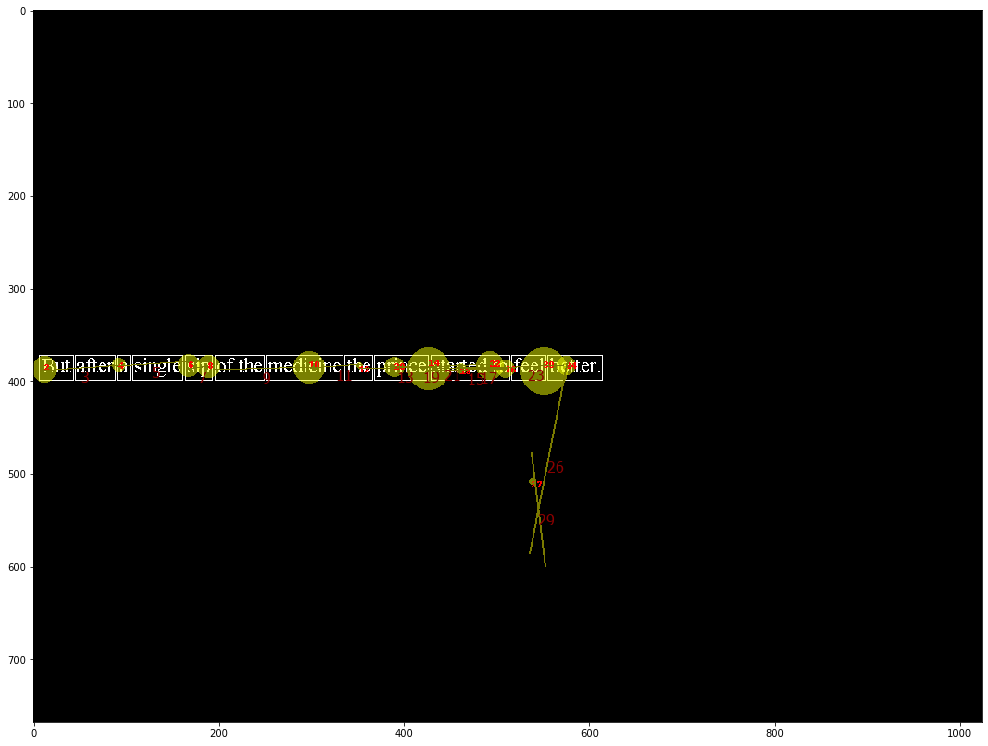

In [5]:
# trial images_path
image_path = "runtime/images/"

im = EMIP[subject_ID].trial[trial_num].draw_trial(image_path, draw_raw_data=False, draw_fixation=True, draw_saccade=True, draw_number=True, draw_aoi=True)

# Apply fixation correction through offset:

You can apply fixation corection using sample_offset(x_offset, y_offset) on the Trial object.

Try running this with:

```
sample_offset(100, 50)
```
You can then visualize the trial to see the effect:
```
draw_trial(image_path, True, True)
```

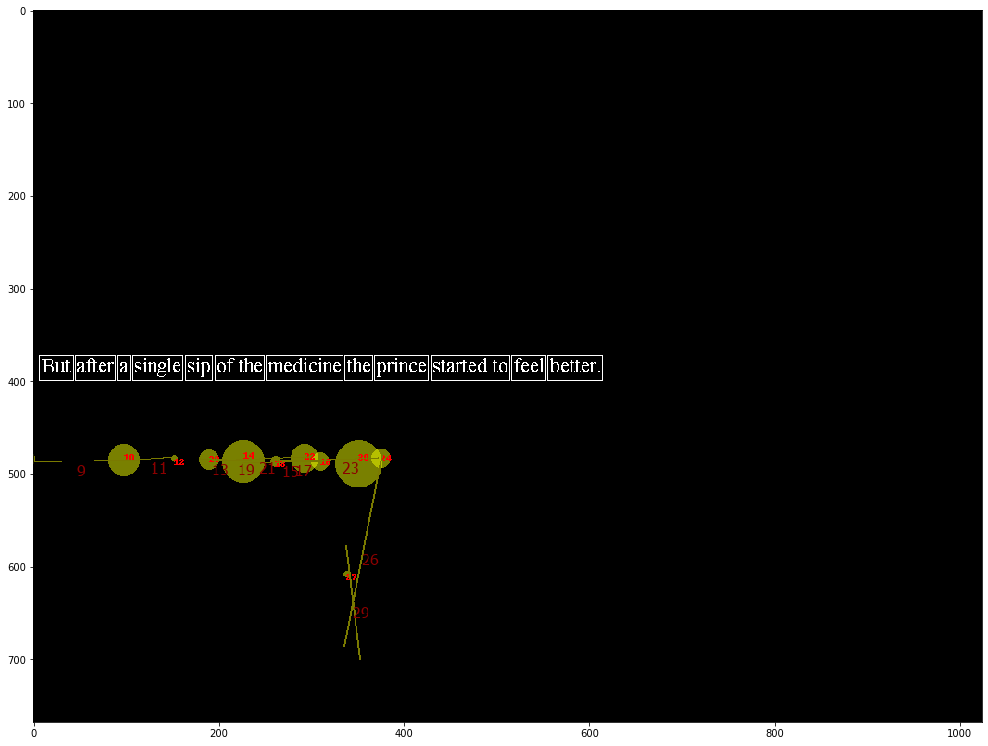

In [6]:
# apply offset
EMIP[subject_ID].trial[trial_num].sample_offset(-200, 100) # x:100 and y:50 just for example

# draw trial again
EMIP[subject_ID].trial[trial_num].draw_trial(image_path, draw_raw_data=False, draw_fixation=True, draw_saccade=True, draw_number=True, draw_aoi=True)

You can get the total applied offset, useful after a few calls to sample_offset method.

Try running this with:
```
get_offset()
```

In [7]:
print("Current offset:", EMIP[subject_ID].trial[trial_num].get_offset())

Current offset: (-200, 100)


After applying offset to samples you can call fixation filter again to generate fixations from samples at thier new position.

# Undo applied offset:

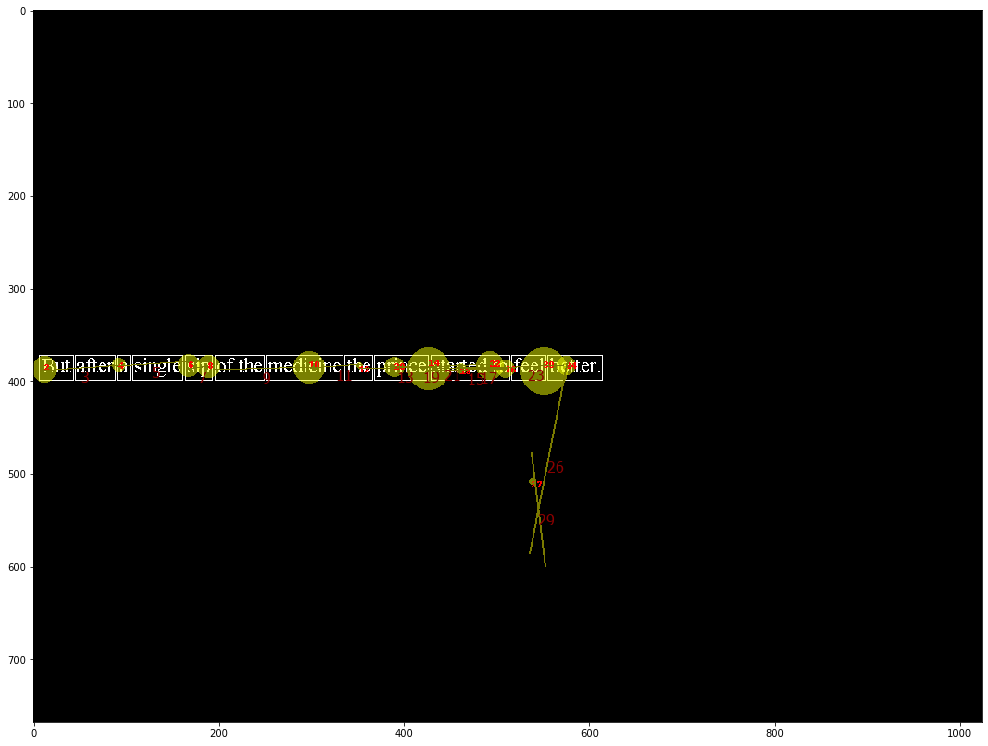

In [9]:
# undo all previous offset
EMIP[subject_ID].trial[trial_num].reset_offset()

# draw trial again
im = EMIP[subject_ID].trial[trial_num].draw_trial(image_path, draw_raw_data=False, draw_fixation=True, draw_saccade=True, draw_number=True, draw_aoi=True)